In [1]:
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /kaggle/working/Mall_Customers.csv
100%|██████████████████████████████████████| 3.98k/3.98k [00:00<00:00, 14.5MB/s]


Apply K-NN, DBSCAN and GMM over the following dataset
Visualize using PCA



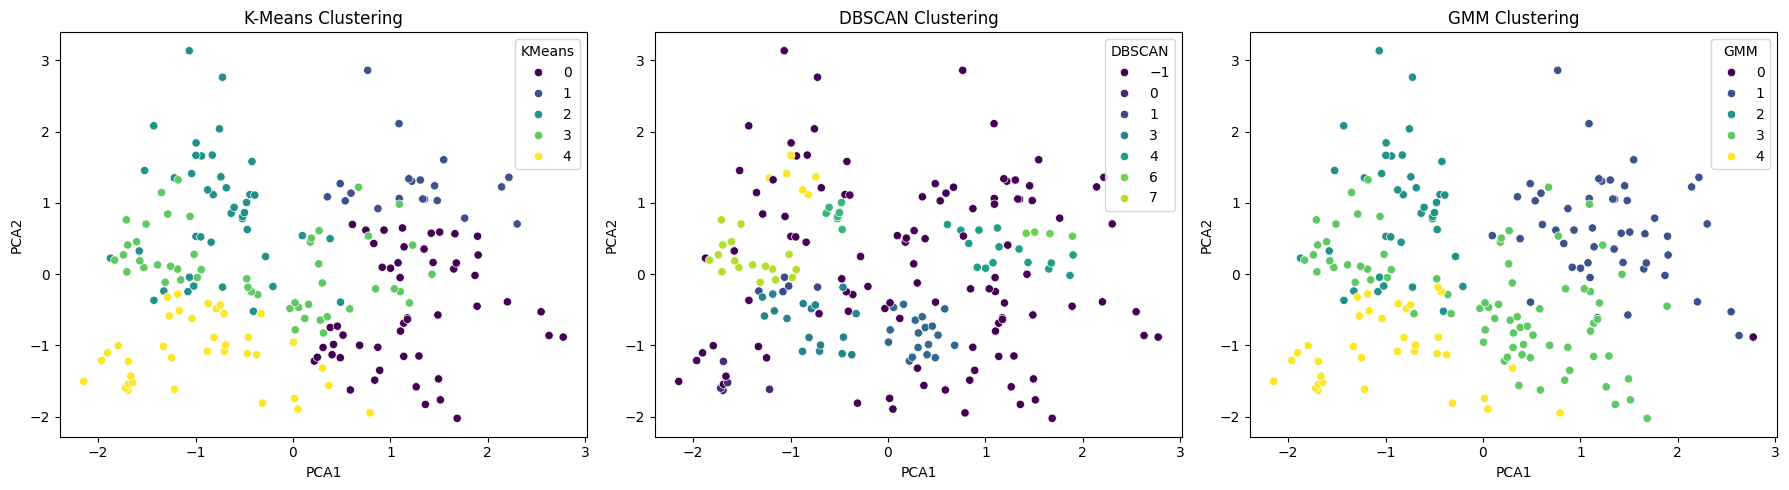

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

df_mall = pd.read_csv("Mall_Customers.csv")
df_mall = df_mall.drop(columns=['CustomerID'])

le = LabelEncoder()
df_mall['Gender'] = le.fit_transform(df_mall['Gender'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_mall)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

kmeans = KMeans(n_clusters=5, random_state=42)
pca_df['KMeans'] = kmeans.fit_predict(scaled_data)

dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['DBSCAN'] = dbscan.fit_predict(scaled_data)

gmm = GaussianMixture(n_components=5, random_state=42)
pca_df['GMM'] = gmm.fit_predict(scaled_data)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans', palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='GMM', palette='viridis')
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()